# Plot a histogram of particle radius

Step 1: select an image showing the particles such as
<img src="test_img.jpg" width="300"/>

Step 2: Using ImageJ (Fiji is the newer software) automatically measure each particle area and save results to .csv file http://microscopy.berkeley.edu/courses/dib/sections/04IPIII/particles.html
* Calibrate image - can use the Macros "nm Hitachi ImageJ scale calib.ijm" or "um Hitachi ImageJ scale calib.ijm" in this folder
* Set the threshold (Image -> Adjust -> Threshold...) so that the particles are highlighted in red
* [OPTIONAL] Clean the selection of what is a particle using Process -> Noise -> Despeckle
* [OPTIONAL] Select region of interest using the rectangle or oval tool
* Measure the particles (Analyze -> Analyze Particles...), select 'include holes', 'Display results', 'Summarize'
* On the results window right click toolbar and select 'Set Measurements', deselect everything bar Area and press 'OK'
* Save .csv of the results to the same folder as this notebook (File -> Save As)

Step 3: Plot the results into a histogram and, optionally, fit with an expected distribution with the following code:

                          Area   Mean    Min    Max      radius
count  306.000000   306.000000  306.0  306.0  306.0  306.000000
mean   153.500000   464.140748  255.0  255.0  255.0   10.126745
std     88.478811   680.238140    0.0    0.0    0.0    6.733334
min      1.000000    24.559000  255.0  255.0  255.0    2.795956
25%     77.250000    73.678000  255.0  255.0  255.0    4.842771
50%    153.500000   221.035000  255.0  255.0  255.0    8.387945
75%    229.750000   491.188000  255.0  255.0  255.0   12.503999
max    306.000000  4985.560000  255.0  255.0  255.0   39.836579


<IPython.core.display.Javascript object>


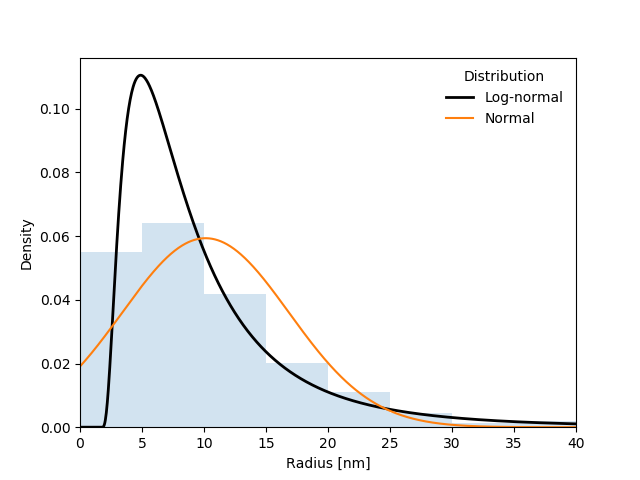

Log-normal fit: Mean 10.3 and Std 8.4
Normal fit: Mean 10.1 and Std 6.7


In [22]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook

### USER INPUT ###
fn = 'Results'  # File name of .csv containing each particle area
### ---------- ###

# Begin analysis
df = pd.read_csv(fn+'.csv') # Load data
df['radius'] = np.sqrt(df['Area']/np.pi) # evaluate particle radius assuming circle
print(df.describe())  # Output key stats on the data 

# Plot density histogram
fig, ax = plt.subplots()
dx = 5  # Width of bins to use for histogram
n_bins = np.arange(0, max(df['radius'])+dx, step=dx)  # Specify bins to put data into
res = ax.hist(np.array(df['radius']), density=True, histtype='stepfilled', alpha=0.2, bins=n_bins)

# [OPTIONAL] Fit a distribution to the plot - comment out unwanted distributions to fit
xn = np.linspace(min(n_bins), max(n_bins), num=1000)  # x values to compute theoretical distribution at

# Lognormal distribution
s, loc, scale = stats.lognorm.fit(df['radius'])  # Fit log-normal parameters to data 
pdf_ln = stats.lognorm.pdf(xn, s, loc, scale)  # now get theoretical values in our interval  
plt.plot(xn, pdf_ln, 'k-', lw=2, label="Log-normal")  # plot it
mean, var = stats.lognorm.stats(s, loc, scale, moments='mv')
print('Log-normal fit: Mean {:.1f} and Std {:.1f}'.format(float(mean), float(np.sqrt(var))))

# Normal distribution
m, s = stats.norm.fit(df['radius']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(xn, m, s) # now get theoretical values in our interval  
plt.plot(xn, pdf_g, label="Normal") # plot it
mean, var = stats.norm.stats(m, s, moments='mv')
print('Normal fit: Mean {:.1f} and Std {:.1f}'.format(float(mean), float(np.sqrt(var))))

# Plot axis labels and legend
ax.set_xlabel('Radius [nm]')
ax.set_ylabel('Density')
ax.legend(loc='best', title='Distribution', frameon=False)
ax.set_xlim([min(n_bins), max(n_bins)])

# [OPTIONAL] Save figure with the same name as the .csv file
plt.savefig(fn + '.png')

Note: for gamma and beta fits see http://danielhnyk.cz/fitting-distribution-histogram-using-python/